### Capstone _ H&M Recommendation System _ Nooshin Mollazadeh

# EDA First Step

In this notebook we are going to have a brief insight about the Article dataset.

***

# Article:

In [76]:
#loading article table
article=pd.read_csv('C:/Users/molla/Capstone/articles.csv')

In [77]:
#looking at the head of the article table
article.head()

article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                     Solid                  9             Black  ...   
1                     Solid                 10             White  ...   
2                    Stripe                 11         Off White  ...   
3                     Solid                  9             Black  ...   
4                     Solid                 10             White  ...   

   department_name index_code        index_name index_group_no  \
0     Jersey Basic          A        Ladieswear              1   
1     Jersey Basic          A        Ladieswear              1   
2     Jersey Basic          A        Ladieswear              1   
3   Clean Lingerie          B  Lingeries/Tights              1   
4   Clean Lingerie          B  Lingeries/Tights              1   

   index_group_name section_no            section_name garment_group_no  \
0        Ladieswear         16  Womens Everyday Basics             1002   
1        Ladieswear         16  Womens Everyday Basics             1002   
2        Ladieswear         16  Womens Everyday Basics             1002   
3        Ladieswear         61         Womens Lingerie             1017   
4        Ladieswear         61         Womens Lingerie             1017   

   garment_group_name                                        detail_desc  
0        Jersey Basic            Jersey top with narrow shoulder straps.  
1        Jersey Basic            Jersey top with narrow shoulder straps.  
2        Jersey Basic            Jersey top with narrow shoulder straps.  
3   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  
4   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  

[5 rows x 25 columns]

In [78]:
#checking the null values
article.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

There are 416 rows with missing detail descriptions but we are not going to remove them becuase later we will combine all the text rows and we will have the description for those items.

In [79]:
#checking the duplicated
article.duplicated().sum()

0

There is no duplicated rows in the article table.

In [80]:
#Checking the table's info
article.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [81]:
#shape of the table
article.shape

(105542, 25)

When we look at the table's info we see that just the detail_desc column has some null values.

In [82]:
#table's columns
article.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

- article_id (int64) - a unique 9-digit identifier of the article, 105542 unique values (as the length of the database)
5 product related columns:
- product_code (int64) - 6-digit product code (the first 6 digits of `article_id`, 47224 unique values
- prod_name (object) - name of a product, 45875 unique values
- product_type_no (int64) - product type number, 131 unique values
- product_type_name (object) - name of a product type, equivalent of product_type_no
- product_group_name (object) - the name of a product group, in total 19 groups
2 columns related to the pattern:
- graphical_appearance_no (int64) - code of a pattern, 30 unique values
- graphical_appearance_name (object) - name of a pattern, 30 unique values
2 columns related to the color:
- colour_group_code (int64) - code of a color, 50 unique values
- colour_group_name (object) - name of a color, 50 unique values
4 columns related to perceived color (general tone):
- perceived_colour_value_id - perceived color id, 8 unique values
- perceived_colour_value_name - perceived color name, 8 unique values
- perceived_colour_master_id - perceived master color id, 20 unique values
- perceived_colour_master_name - perceived master color name, 20 unique values
2 columns related to the department:
- department_no - department number, 299 unique values
- department_name - department name, 299 unique values
4 columns related to the index, which is actually a top-level category:
- index_code - index code, 10 unique values
- index_name - index name, 10 unique values
- index_group_no - index group code, 5 unique values
- index_group_name - index group code, 5 unique values
2 columns related to the section:
- section_no - section number, 56 unique values
- section_name - section name, 56 unique values
2 columns related to the garment group:
- garment_group_n - section number, 56 unique values
- garment_group_name - section name, 56 unique values
1 column with a detailed description of the article:
- detail_desc - 43404 unique values


### prod_name:

In [83]:
#looking to the prod_name different categories
article['prod_name'].value_counts()

Dragonfly dress                98
Mike tee                       72
Wow printed tee 6.99           70
1pk Fun                        55
TP Paddington Sweater          54
                               ..
W MARCIE DRESS CNY              1
W NAPOLI SKIRT CNY              1
BEANIE JERSEY FLEECED LINED     1
H-string multicolour            1
Lounge dress                    1
Name: prod_name, Length: 45875, dtype: int64

There is 45,875 different product names in the prod_name column.

In [84]:
#top 30 product names by grouping the product names and counting numbers of them then sorting them 
prod_name_30 = article.groupby(['prod_name']).size().rename('Number').reset_index().sort_values(['Number'],ascending=False).head(30)
prod_name_30

prod_name  Number
12399        Dragonfly dress      98
28001               Mike tee      72
45177   Wow printed tee 6.99      70
183                  1pk Fun      55
41803  TP Paddington Sweater      54
33796               Pria tee      51
11916              Despacito      48
26482                     MY      44
35295        Robin 3pk Fancy      43
34052     R-NECK SS SLIM FIT      42
14096    Eivor 7-p shaftless      42
10734              DANTE set      42
43537     V-NECK SS SLIM FIT      41
6471       CAMDEN s/s tee TP      41
18220           HAPPY TEE TP      41
8540             Charlie Top      41
36326                SBC OWN      40
31528             PETER POLO      39
20675         James leggings      37
30021           Nora T-shirt      37
38577        Scarf Scrunchie      36
41660              TOM FANCY      36
45318                   Yate      35
35049    Richie Regular Hood      35
6123           Brit Baby Tee      34
25530         Luna skinny RW      34
798        5pk regular fancy      34
35391            Roll Up Tee      33
39788        Sleepbag Padded      32
22849         Knot aliceband      32

Top 3 product names which has the highest number of articles are Dragonfly dress, Mike tee and Wow printed tee 6.99.

<Figure size 720x576 with 0 Axes>

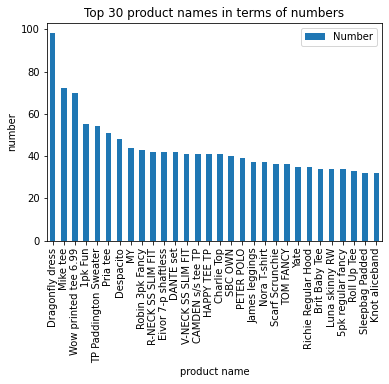

In [85]:
#plotting the top 30 product names in terms of number of articles
plt.figure(figsize=(10,8))

article.groupby(['prod_name']).size().rename('Number').reset_index().sort_values(['Number'],ascending=False).head(30).plot(x='prod_name',kind='bar')

plt.xlabel('product name')
plt.ylabel('number')

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.title('Top 30 product names in terms of numbers')

plt.show()


## Figure 17:

Dragonfly dress, Mike tee and wow printed tee 69 are the top 3 product names which have the most number of articles in their category.

### product_type_name:

In [86]:
#How many values are in the product type name column:
article['product_type_name'].value_counts()

Trousers         11169
Dress            10362
Sweater           9302
T-shirt           7904
Top               4155
                 ...  
Keychain             1
Headband             1
Cushion              1
Blanket              1
Clothing mist        1
Name: product_type_name, Length: 131, dtype: int64

In [87]:
#unique product types
total_prod_type = article["product_type_name"].nunique()

In [88]:
print(total_prod_type)

131


There are 131 unique product types among articles.

In [89]:
#Looking to the top 30 top product types
prod_type_30 = article["product_type_name"].value_counts().head(30)
prod_type_30

Trousers             11169
Dress                10362
Sweater               9302
T-shirt               7904
Top                   4155
Blouse                3979
Jacket                3940
Shorts                3939
Shirt                 3405
Vest top              2991
Underwear bottom      2748
Skirt                 2696
Hoodie                2356
Bra                   2212
Socks                 1889
Leggings/Tights       1878
Sneakers              1621
Cardigan              1550
Hat/beanie            1349
Garment Set           1320
Swimwear bottom       1307
Bag                   1280
Earring               1159
Jumpsuit/Playsuit     1147
Pyjama set            1120
Blazer                1110
Other accessories     1034
Boots                 1028
Scarf                 1013
Bodysuit               913
Name: product_type_name, dtype: int64

We see the top 3 product types are Trousers, Dress and Sweaters.

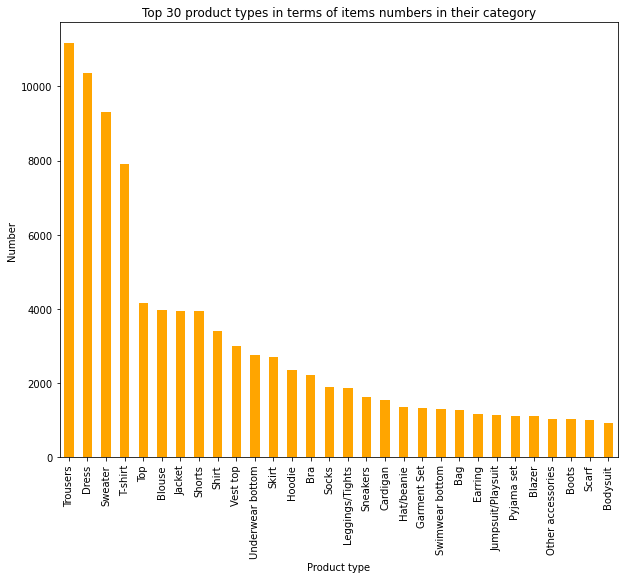

In [90]:
#plotting the top 30 product types by number
plt.figure(figsize=(10,8))

prod_type_30.plot(kind='bar', color='orange')

plt.xlabel('Product type')

plt.ylabel('Number')

plt.title('Top 30 product types in terms of items numbers in their category')

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

## Figure 18:

Trousers, Dress and sweaters are top 3 product types which contains the highest number of items.

### Product_group_name:

In [91]:
#How different values are in the product type name column:
article['product_group_name'].value_counts()

Garment Upper body       42741
Garment Lower body       19812
Garment Full body        13292
Accessories              11158
Underwear                 5490
Shoes                     5283
Swimwear                  3127
Socks & Tights            2442
Nightwear                 1899
Unknown                    121
Underwear/nightwear         54
Cosmetic                    49
Bags                        25
Items                       17
Furniture                   13
Garment and Shoe care        9
Stationery                   5
Interior textile             3
Fun                          2
Name: product_group_name, dtype: int64

In [92]:
article['product_group_name'].nunique()

19

There are 19 different product group names among articles.

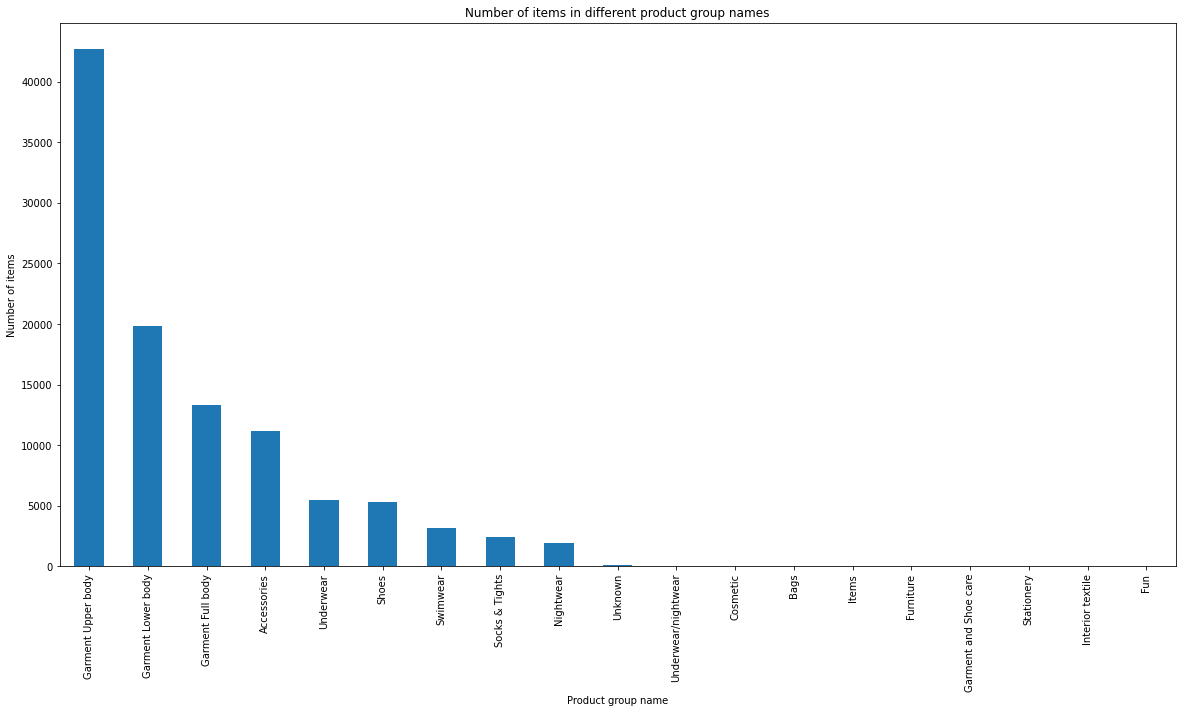

In [93]:
#plotting the different product group names counts
#plotting a bar chart
article['product_group_name'].value_counts().plot(figsize=(20,10),kind='bar')

plt.title('Number of items in different product group names')

plt.xlabel('Product group name')

plt.ylabel('Number of items')

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

## Figure 19:

Garment upper body, Garment lower body and garment full body are the 3 groups with largest number of items in their groups.

### graphical_appearance_name:

In [94]:
#different values in graphical_appearance_name
article['graphical_appearance_name'].value_counts()

Solid                  49747
All over pattern       17165
Melange                 5938
Stripe                  4990
Denim                   4842
Front print             3215
Placement print         3098
Check                   2178
Colour blocking         1830
Lace                    1513
Other structure         1502
Application/3D          1341
Embroidery              1165
Mixed solid/pattern     1132
Glittering/Metallic      958
Jacquard                 830
Sequin                   806
Dot                      681
Treatment                586
Other pattern            515
Contrast                 376
Metallic                 346
Chambray                 322
Slub                     153
Transparent               86
Mesh                      86
Neps                      66
Unknown                   52
Argyle                    15
Hologram                   8
Name: graphical_appearance_name, dtype: int64

In [95]:
article['graphical_appearance_name'].nunique()

30

There are 30 different graphical_appearance_names in this column.

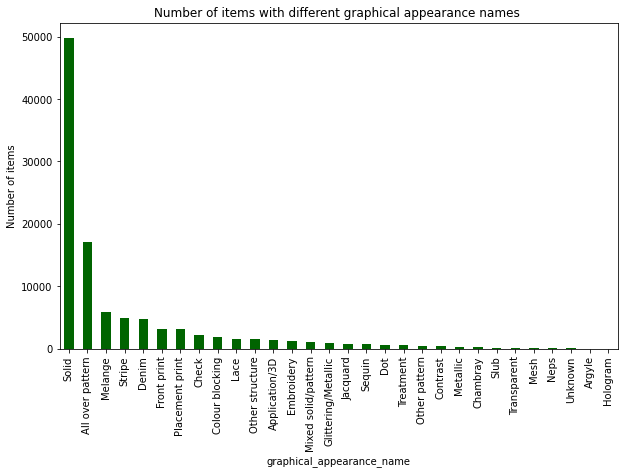

In [96]:
#We can see the distribution of number of items with differet graphical_appearance_name using bar chart
article['graphical_appearance_name'].value_counts().plot(figsize=(10,6),kind='bar',color='darkgreen')

plt.title('Number of items with different graphical appearance names ')

plt.xlabel('graphical_appearance_name')

plt.ylabel('Number of items')

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)


plt.show()

## Figure 20:

Solid, All over pattern and Melange are the top 3 graphical appearences in terms of items counts.

### colour_group_name:

In [97]:
#different categories of colour_group_name 
article['colour_group_name'].value_counts()

Black              22670
Dark Blue          12171
White               9542
Light Pink          5811
Grey                4487
Light Beige         3356
Blue                3308
Red                 3056
Light Blue          3012
Greenish Khaki      2767
Dark Grey           2731
Off White           2726
Beige               2712
Dark Red            2340
Dark Green          2106
Light Grey          2105
Pink                2063
Yellow              1645
Light Orange        1520
Yellowish Brown     1471
Gold                1377
Dark Beige          1084
Light Turquoise     1027
Light Yellow         984
Dark Orange          886
Dark Pink            818
Green                815
Orange               779
Other Pink           750
Silver               709
Light Green          681
Dark Yellow          574
Light Purple         553
Dark Turquoise       473
Turquoise            435
Dark Purple          315
Light Red            285
Greyish Beige        226
Other Yellow         225
Purple               182


In [98]:
#how many unique values it has
article['colour_group_name'].nunique()

50

The items are devided into 50 different colour_group_names.

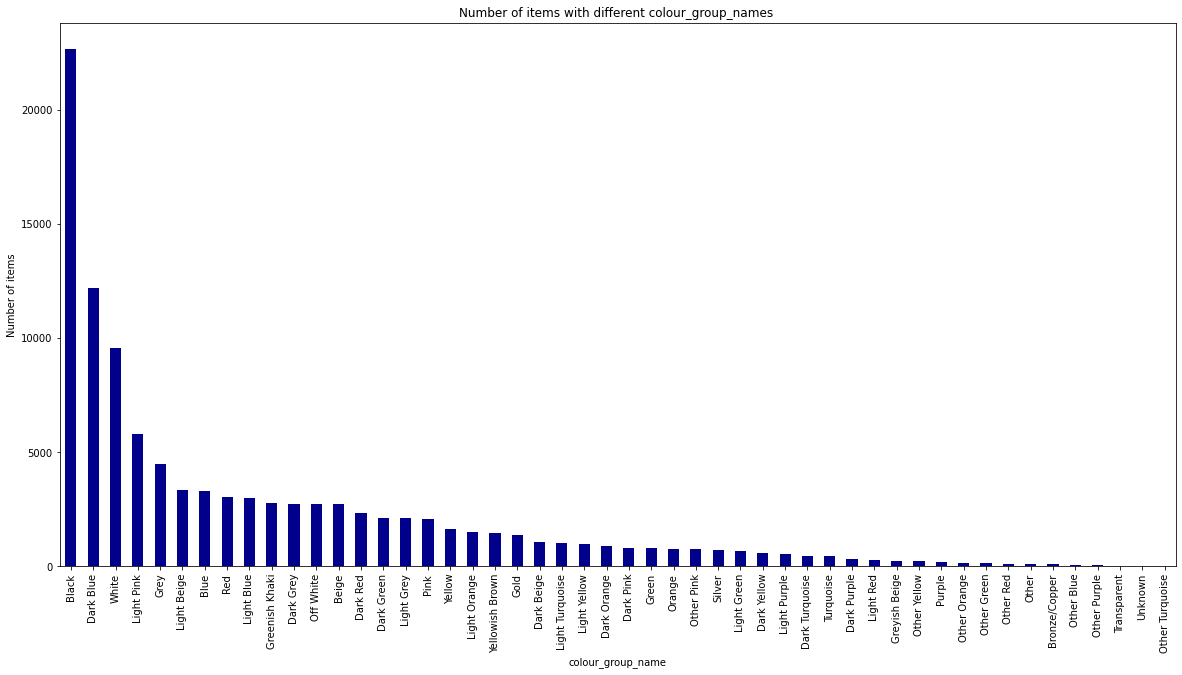

In [99]:
#We can see the distribution of number of items with differet colour_group_names using bar chart

article['colour_group_name'].value_counts().plot(figsize=(20,10),kind='bar',color='darkblue')

plt.title('Number of items with different colour_group_names ')

plt.xlabel('colour_group_name')

plt.ylabel('Number of items')

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)


plt.show()

## Figure 21

Most of the items have Black, Dark Blue, white and light pink color.

### perceived_colour_value_name:

In [100]:
#different values in perceived_colour_value_name
article['perceived_colour_value_name'].value_counts()

Dark            42706
Dusty Light     22152
Light           15739
Medium Dusty    12630
Bright           6471
Medium           5711
Undefined         105
Unknown            28
Name: perceived_colour_value_name, dtype: int64

In [101]:
#how many unique values are in aperceived_colour_value_name
article['perceived_colour_value_name'].nunique()

8

There is 8 different perceived color value names.

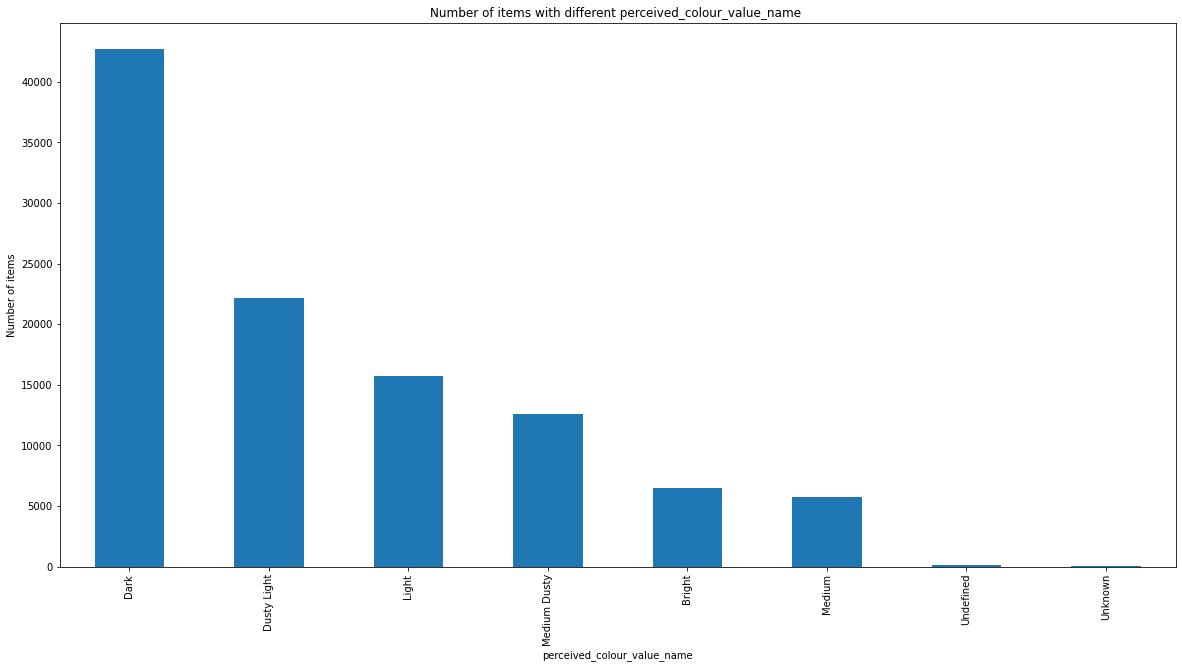

In [102]:
#We can see the distribution of number of items with differet perceived_colour_value_name using bar chart
article['perceived_colour_value_name'].value_counts().plot(figsize=(20,10),kind='bar')

plt.title('Number of items with different perceived_colour_value_name ')

plt.xlabel('perceived_colour_value_name')

plt.ylabel('Number of items')

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)


plt.show()

## Figure 22:

Dark, Dusty Light and light are the top percieved color among the h&m items.

### depatment_name:

In [103]:
#different values in department_name
article['department_name'].value_counts()

Jersey                             4604
Knitwear                           3503
Trouser                            2655
Blouse                             2362
Dress                              2087
                                   ... 
Woven bottoms inactive from S.7       1
Jersey inactive from S.6              1
EQ Divided Blue                       1
Accessories Other                     1
Kids Boy License                      1
Name: department_name, Length: 250, dtype: int64

In [104]:
article['department_name'].nunique()

250

There are 250 different department names.

In [105]:
#plotting the top 30 department names in terms of item numbers
department_name_30=article['department_name'].value_counts().head(30)
department_name_30

Jersey                     4604
Knitwear                   3503
Trouser                    2655
Blouse                     2362
Dress                      2087
Swimwear                   2075
Kids Girl Jersey Fancy     2032
Expressive Lingerie        1921
Young Girl Jersey Fancy    1874
Jersey Fancy               1754
Jersey Basic               1514
Kids Boy Jersey Fancy      1488
Tops Fancy Jersey          1429
Jersey fancy               1402
Dresses                    1354
Basic 1                    1339
Jewellery                  1163
Shirt                      1153
Baby basics                1147
Tops Knitwear              1115
Young Boy Jersey Fancy     1100
Kids Girl Jersey Basic     1098
Baby Toys/Acc              1054
Outwear                    1009
Tops Woven                 1007
Ladies Sport Bras          1006
Baby Exclusive              944
Blouse & Dress              897
Kids Girl Dresses           879
Small Accessories           873
Name: department_name, dtype: int64

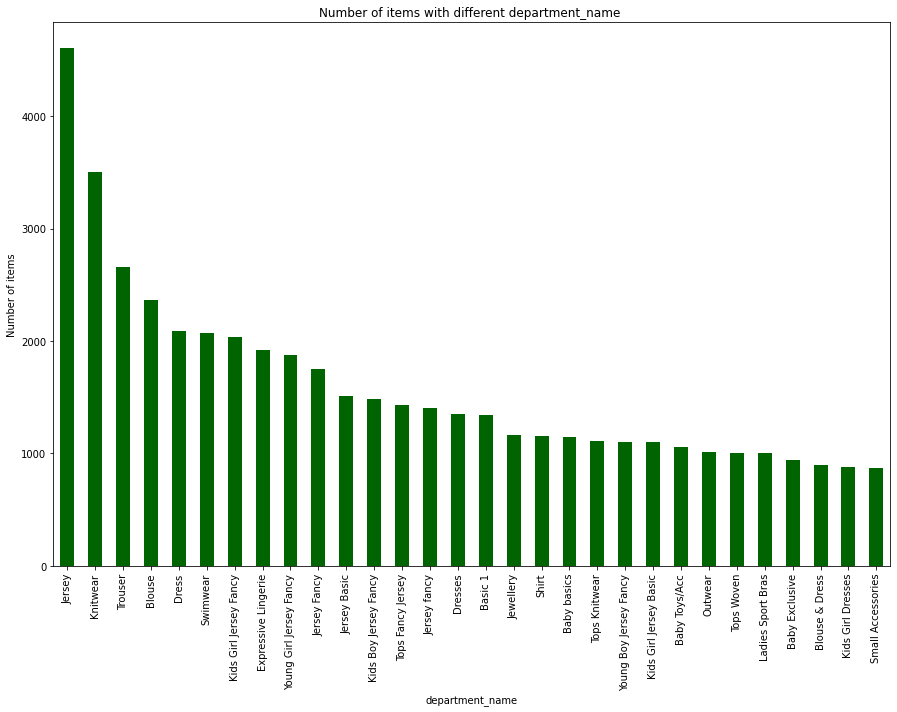

In [106]:
department_name_30.plot(figsize=(15,10),kind='bar',color='darkgreen')

plt.title('Number of items with different department_name ')

plt.xlabel('department_name')

plt.ylabel('Number of items')

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

## Figure 23:

Most of the items are in the jersey, knitwear or trousers department.

## Index_name

In [107]:
#different categories in index_name column
article['index_name'].value_counts()

Ladieswear                        26001
Divided                           15149
Menswear                          12553
Children Sizes 92-140             12007
Children Sizes 134-170             9214
Baby Sizes 50-98                   8875
Ladies Accessories                 6961
Lingeries/Tights                   6775
Children Accessories, Swimwear     4615
Sport                              3392
Name: index_name, dtype: int64

In [108]:
article['index_name'].nunique()

10

There are 10 different index names in the articles.

In [109]:
plot_distribution('index_name', article, 'index_name distribution')

## Figure 24:

Ladieswear, Divided and Menswear are the top 3 indexes in terms of items numbers.

## Index_group_name

In [110]:
#different categories and counts in this column
article['index_group_name'].value_counts()

Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: index_group_name, dtype: int64

In [111]:
article['index_group_name'].nunique()

5

We have 5 unique index group name.

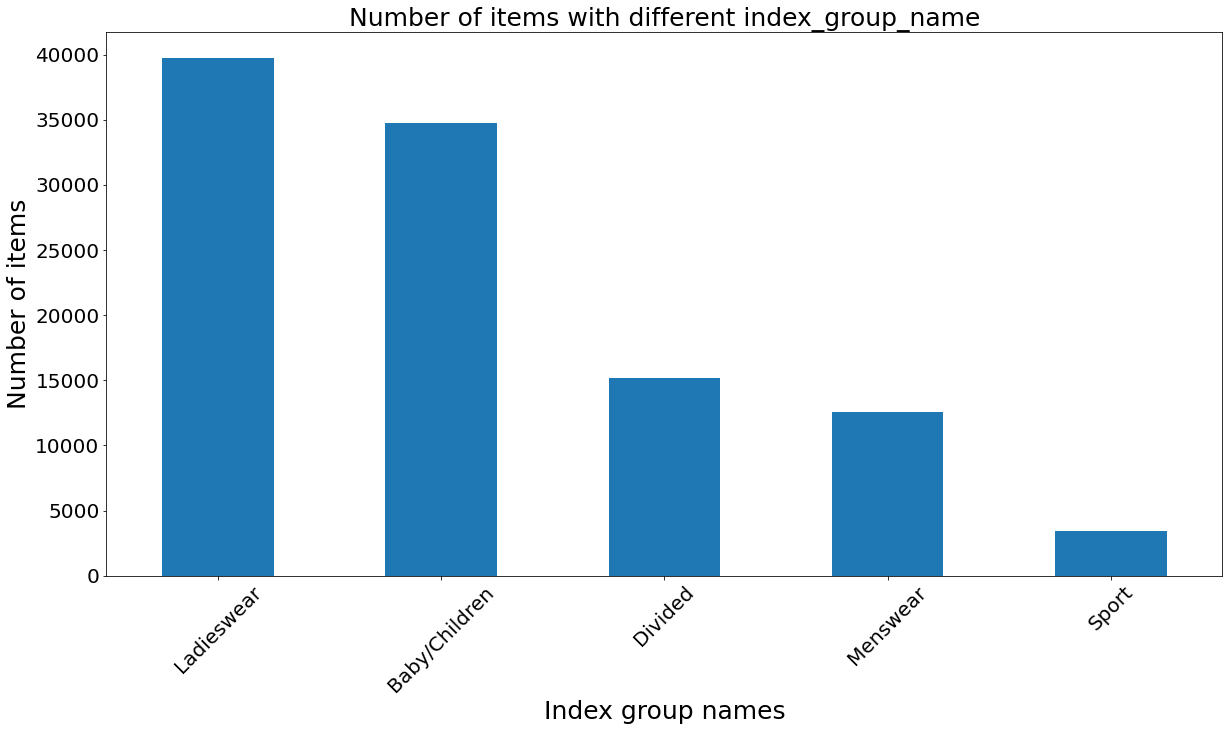

In [112]:
#We can see the distribution of number of items with differet perceived_colour_value_name using bar chart
article['index_group_name'].value_counts().plot(figsize=(20,10),kind='bar')

plt.title('Number of items with different index_group_name',fontsize=25)

plt.xlabel('Index group names',fontsize=25)

plt.ylabel('Number of items',fontsize=25)

plt.xticks(fontsize = 20, rotation=45)
plt.yticks(fontsize = 20)


plt.show()

## Figure 25:

Ladieswear, Baby/Children and devided are the top 3 index group names among 5 index group names.

## Section_name:

In [113]:
#different values in section name
article['section_name'].value_counts()

Womens Everyday Collection        7295
Divided Collection                7124
Baby Essentials & Complements     4932
Kids Girl                         4469
Young Girl                        3899
Womens Lingerie                   3598
Girls Underwear & Basics          3490
Womens Tailoring                  3376
Kids Boy                          3328
Womens Small accessories          3270
Womens Casual                     2725
Kids Outerwear                    2665
Womens Trend                      2622
Divided Projects                  2364
Young Boy                         2352
H&M+                              2337
Men Underwear                     2322
Mama                              2266
Kids & Baby Shoes                 2142
Boys Underwear & Basics           2034
Womens Shoes                      2026
Ladies H&M Sport                  1894
Womens Swimwear, beachwear        1839
Contemporary Smart                1778
Baby Girl                         1760
Divided Accessories      

In [114]:
article['section_name'].nunique()

56

Articles belong to 56 different section names.

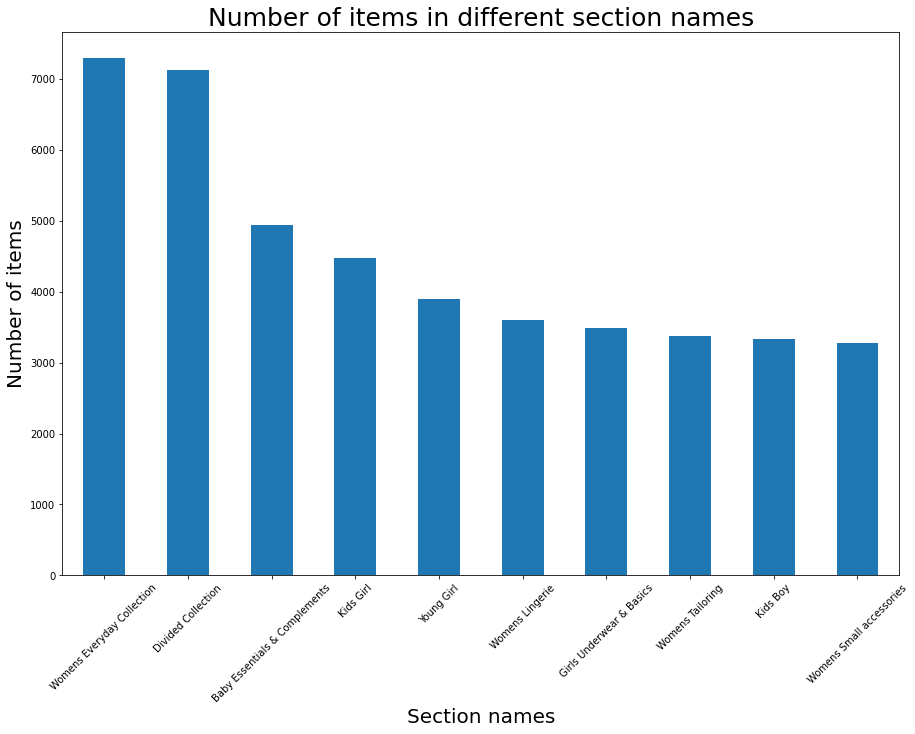

In [115]:
#plotting the top 10 section names 
article["section_name"].value_counts().head(10).plot(figsize=(15,10),kind='bar')

plt.title('Number of items in different section names',fontsize=25)

plt.xlabel('Section names',fontsize=20)

plt.ylabel('Number of items',fontsize=20)

plt.xticks(fontsize = 10, rotation=45)
plt.yticks(fontsize = 10)


plt.show()

## Figure 26:

Womens everyday collection, divided collection and baby essentials are the top 3 section names.

## Garment Group Name:

In [116]:
#different categories and counts
article['garment_group_name'].value_counts()

Jersey Fancy                     21445
Accessories                      11519
Jersey Basic                      8126
Knitwear                          7490
Under-, Nightwear                 7441
Trousers                          6727
Blouses                           5838
Shoes                             5145
Dresses Ladies                    4874
Outdoor                           4501
Unknown                           3873
Trousers Denim                    3100
Swimwear                          2787
Socks and Tights                  2272
Shirts                            2116
Woven/Jersey/Knitted mix Baby     1965
Shorts                            1559
Dresses/Skirts girls              1541
Skirts                            1254
Special Offers                    1061
Dressed                            908
Name: garment_group_name, dtype: int64

In [117]:
article['garment_group_name'].nunique()

21

We have 21 different garment group names.

In [118]:
#plotting distribution using plotly
plot_distribution('garment_group_name', article, 'Number of items in different garment groups')

## Figure 27:

Jersey Fancy and accessories are the two top garment group names with the largest number of items groups.

## Detail_des:

In [119]:
article['detail_desc'].fillna(value='', inplace=True)

In [120]:
#all the columns that we analyzed have categorial number column that we do not need so we can drop those.
df1=article.drop(columns=['product_code', 'product_type_no',
     'graphical_appearance_no',
      'colour_group_code',
       'perceived_colour_value_id',
       'perceived_colour_master_id',
       'department_no', 'index_code',
       'index_group_no', 'section_no',
       'garment_group_no'], axis=1)

In [124]:

#sanity check

df1.head()

article_id          prod_name product_type_name  product_group_name  \
0   108775015          Strap top          Vest top  Garment Upper body   
1   108775044          Strap top          Vest top  Garment Upper body   
2   108775051      Strap top (1)          Vest top  Garment Upper body   
3   110065001  OP T-shirt (Idro)               Bra           Underwear   
4   110065002  OP T-shirt (Idro)               Bra           Underwear   

  graphical_appearance_name colour_group_name perceived_colour_value_name  \
0                     Solid             Black                        Dark   
1                     Solid             White                       Light   
2                    Stripe         Off White                 Dusty Light   
3                     Solid             Black                        Dark   
4                     Solid             White                       Light   

  perceived_colour_master_name department_name        index_name  \
0                        Black    Jersey Basic        Ladieswear   
1                        White    Jersey Basic        Ladieswear   
2                        White    Jersey Basic        Ladieswear   
3                        Black  Clean Lingerie  Lingeries/Tights   
4                        White  Clean Lingerie  Lingeries/Tights   

  index_group_name            section_name garment_group_name  \
0       Ladieswear  Womens Everyday Basics       Jersey Basic   
1       Ladieswear  Womens Everyday Basics       Jersey Basic   
2       Ladieswear  Womens Everyday Basics       Jersey Basic   
3       Ladieswear         Womens Lingerie  Under-, Nightwear   
4       Ladieswear         Womens Lingerie  Under-, Nightwear   

                                         detail_desc  
0            Jersey top with narrow shoulder straps.  
1            Jersey top with narrow shoulder straps.  
2            Jersey top with narrow shoulder straps.  
3  Microfibre T-shirt bra with underwired, moulde...  
4  Microfibre T-shirt bra with underwired, moulde...

In [122]:
#After droping those columns We will save the article dataset to use later

df1.to_csv('Article.csv')

In [123]:
#After filling the na values of customer table we will save it in a new csv file
customer.to_csv('Customer_clean.csv')